In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [3]:
x_train.shape[0]
# x_test.shape

50000

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


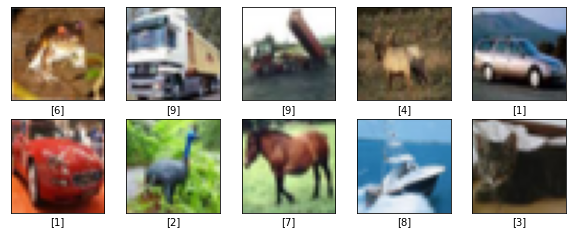

In [5]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap='Greys')
    plt.xlabel(y_train[i])
plt.show()



In [6]:
img_rows = 32
img_cols = 32
batch_size = 512
im_shape = (img_rows, img_cols, 3)

# x_train = x_train.reshape(x_train.shape[0], img_cols, img_rows, 1)
# x_test = x_test.reshape(x_test.shape[0], img_cols, img_rows, 1)


print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print(im_shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
(32, 32, 3)


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(img_rows,img_cols,3)))    
model.add(Conv2D(32, (3, 3), activation='relu'))    
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

    
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))    
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
    
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
    
model.add(Dense(10, activation='softmax'))   

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0

In [9]:
#Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
      optimizer=Adam(lr=0.0001),
      metrics=['accuracy'])



In [10]:
#fitting the model
batch_size = 512
epochs = 80

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,validation_data=(x_test,y_test),
          verbose=1)

Epoch 1/80
98/98 [==============================] - 7s 68ms/step - loss: 9.6059 - accuracy: 0.1271 - val_loss: 2.2742 - val_accuracy: 0.1498
Epoch 2/80
98/98 [==============================] - 6s 60ms/step - loss: 2.3311 - accuracy: 0.1336 - val_loss: 2.2524 - val_accuracy: 0.1525
Epoch 3/80
98/98 [==============================] - 6s 60ms/step - loss: 2.2641 - accuracy: 0.1466 - val_loss: 2.1908 - val_accuracy: 0.1868
Epoch 4/80
98/98 [==============================] - 6s 60ms/step - loss: 2.2238 - accuracy: 0.1649 - val_loss: 2.1159 - val_accuracy: 0.2247
Epoch 5/80
98/98 [==============================] - 6s 61ms/step - loss: 2.1751 - accuracy: 0.1848 - val_loss: 2.0438 - val_accuracy: 0.2568
Epoch 6/80
98/98 [==============================] - 6s 60ms/step - loss: 2.1062 - accuracy: 0.2102 - val_loss: 1.9249 - val_accuracy: 0.3022
Epoch 7/80
98/98 [==============================] - 6s 60ms/step - loss: 2.0011 - accuracy: 0.2446 - val_loss: 1.8140 - val_accuracy: 0.3507
Epoch 8/80
98

In [11]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.6969 - accuracy: 0.7667


[0.6968755125999451, 0.766700029373169]

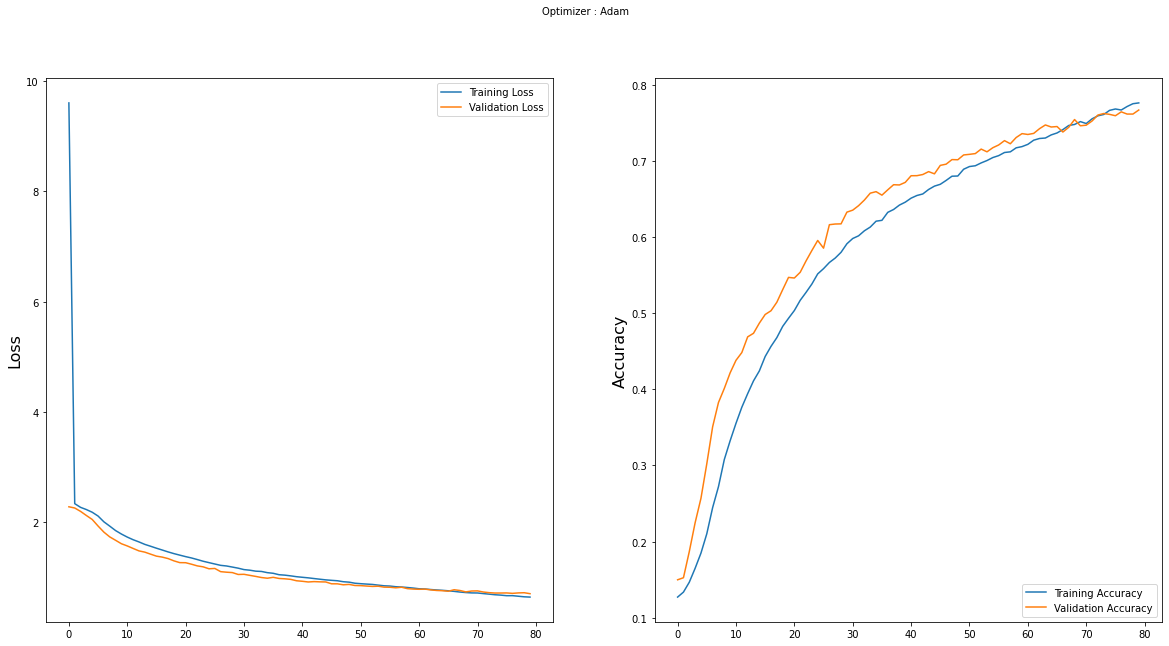

In [12]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


In [13]:
predictions = model.predict(
      x=x_test
    , batch_size=10
    , verbose=0
)



In [ ]:
for i in predictions:
    print(i)

In [18]:
labels_pred = np.argmax(predictions,axis=1)
print(labels_pred)



[3 8 8 ... 5 2 7]


In [19]:
correct = (labels_pred == y_test)
print(correct)


[[ True False False ... False False False]
 [False  True  True ... False False False]
 [False  True  True ... False False False]
 ...
 [False False False ...  True False False]
 [False False False ... False False False]
 [False False False ... False False  True]]


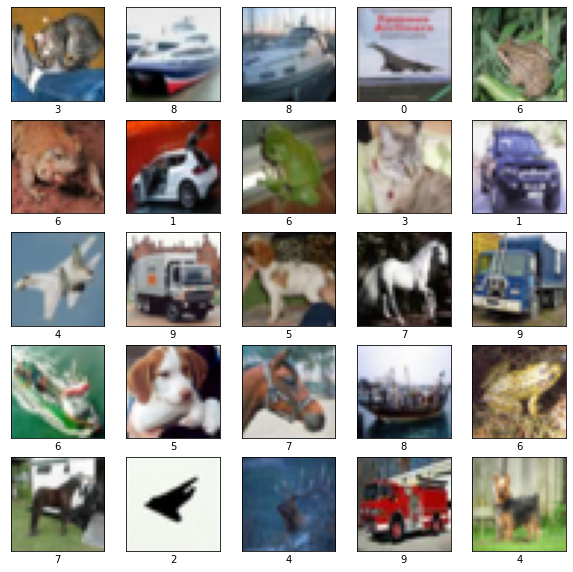

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(labels_pred[i])
plt.show()


In [21]:

print(y_test[0:25])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]]
